In [40]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, KFold
from sklearn.dummy import DummyClassifier
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn.metrics import accuracy_score, plot_confusion_matrix

seed = np.random.seed(42)
rng = np.random.RandomState(42)

Train- and Testsplit are already provided and are 50/50. 

In [11]:
df = pd.read_csv("../data/speeddating/speeddating_num.csv")

X_train, X_test, y_train, y_test = train_test_split(df.drop(['match'], axis=1), df['match'])


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### KNN

In [15]:
def knn(X_train, y_train, X_test):
    knn = KNeighborsClassifier(n_neighbors=23, metric='euclidean')
    knn.fit(X_train, y_train)
    return knn.predict(X_test)
    
knn = KNeighborsClassifier(n_neighbors=23, metric='euclidean')
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

#### SVC

In [36]:
def svc_grid(X_train, y_train, X_test):
    print('\nSVC')
    grid = GridSearchCV(estimator=LinearSVC(random_state = 42),
                        param_grid={'C': C}, 
                        cv = cv)
    grid.fit(X_train, y_train)
    print('Best Parameters with a score of is Accuracy of', grid.best_score_)
    print(grid.best_params_)
    return grid.best_estimator_

def svc(X_train, y_train, X_test):
    # {'kernel': 'linear'}
    svc = SVC(random_state = 42)
    svc.fit(X_train, y_train)
    return svc.predict(X_test)

svc = LinearSVC(random_state=42, dual=False, C=0.0045)

#### Random Forest

In [26]:
def randomForest_grid(X_train, y_train, X_test):
    print('\nRandom Forest')
    grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 42),
                 param_grid={'n_estimators': rf_n_estimators,
                             'max_depth': rf_max_depth,
                             'max_features': rf_max_features},
                        cv = cv)
    grid.fit(X_train, y_train)
    print('Best Parameters with a score of is Accuracy of', grid.best_score_)
    print(grid.best_params_)
    return grid.best_estimator_

def randomForest(X_train, y_train, X_test):
    print('\nRandom Forest')
    rf = RandomForestClassifier(max_depth = 20, min_samples_leaf = 15, n_estimators = 20)
    rf.fit(X_train, y_train)
    return rf.predict(X_test), rf

rf = RandomForestClassifier(max_depth=25, max_features='auto', n_estimators=150)

## CV vs. Holdout

In [28]:
# use train set and split it within with random seeds 
# collect scores and take average and std
# use with best model (taking accuracy from all classifiers)
def collect_holdout(model, h_range):
    scores = []
    for i in h_range:
        XX_train, XX_test, yy_train, yy_test = train_test_split(X_train, 
                                                            y_train, 
                                                            test_size=0.25, 
                                                            random_state=i)
        model.fit(XX_train, yy_train)
        scores.append(model.score(XX_test, yy_test))
    return scores

In [29]:
h_range = range(0,50)
knn_holdout = collect_holdout(knn, h_range)

In [37]:
h_range = range(0,50)
svc_holdout = collect_holdout(svc, h_range)

In [34]:
h_range = range(0,50)
rf_holdout = collect_holdout(rf, h_range)

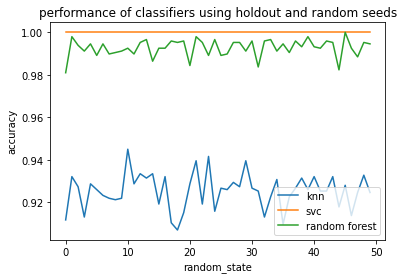

In [44]:
plt.plot(h_range, knn_holdout)
plt.plot(h_range, svc_holdout)
plt.plot(h_range, rf_holdout)

plt.legend(['knn', 'svc', 'random forest'], loc='lower right')
plt.title(f'performance of classifiers using holdout and random seeds')
plt.xlabel('random_state')
plt.ylabel('accuracy')
plt.savefig(f'holdout.png')
plt.show()

## Significance Testing

In [43]:
# significance threshold of α=0.05 for rejecting the null hypothesis 
# that both algorithms perform equally well on the dataset
# if p > α, null hypothesis cannot be rejected
# if p < α, null hypothesis can be rejected, significant difference
def significanceTesting(model, X, y):
    # DummyClassifier, strategy "stratified"
    dummy = DummyClassifier(random_state = 42)
    t, p = paired_ttest_5x2cv(estimator1=dummy,
                          estimator2=model,
                          X=X, y=y,
                          random_seed=1)
    print('t statistic: %.3f' % t)
    print('p value: %.3f' % p)
significanceTesting(svc, df.drop(['match'], axis=1), df['match'])

/usr/local/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

t statistic: -99.344
p value: 0.000
